# Imports and Define Dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
dataset = pd.read_csv('traffic_data.csv')

# Data Setup

## Data Cleaning

In [37]:
i = 0
for value in dataset['startTime']:
    start = value[11:]
    start = start.replace(':', '')
    start_int = int(start) / 10000
    final = 0
    if start_int < 12:
        final = 1
    elif 12 < start_int and start_int < 18:
        final = 2
    else:
        final = 3
    dataset.startTime.iloc[[i]] = final
    i += 1

C:\Users\sindh\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
i = 0
for value in dataset['endTime']:
    end = value[11:]
    end = end.replace(':', '')
    end_int = int(end) / 10000
    if end_int < 12:
        final = 1
    elif 12 < end_int and end_int < 18:
        final = 2
    else:
        final = 3
    dataset.endTime.iloc[[i]] = final
    i += 1

In [39]:
i = 0
for value in dataset['impacting']:
    if value:
        dataset.impacting.iloc[[i]] = 1
    else:
        dataset.impacting.iloc[[i]] = 0
    i += 1
dataset

,severity,type,startTime,endTime,distance,impacting
0,2,1,1,2,6.160000,0
1,0,1,1,3,0.000000,0
2,0,1,1,3,0.000000,0
3,1,1,1,1,0.000000,0
4,0,1,1,1,0.000000,0
5,0,1,1,1,0.000000,0
6,0,1,1,1,0.000000,0
7,0,1,1,3,1.210000,0
8,2,1,1,3,0.000000,0
9,1,1,1,1,0.730000,1


## Correlation Matrix

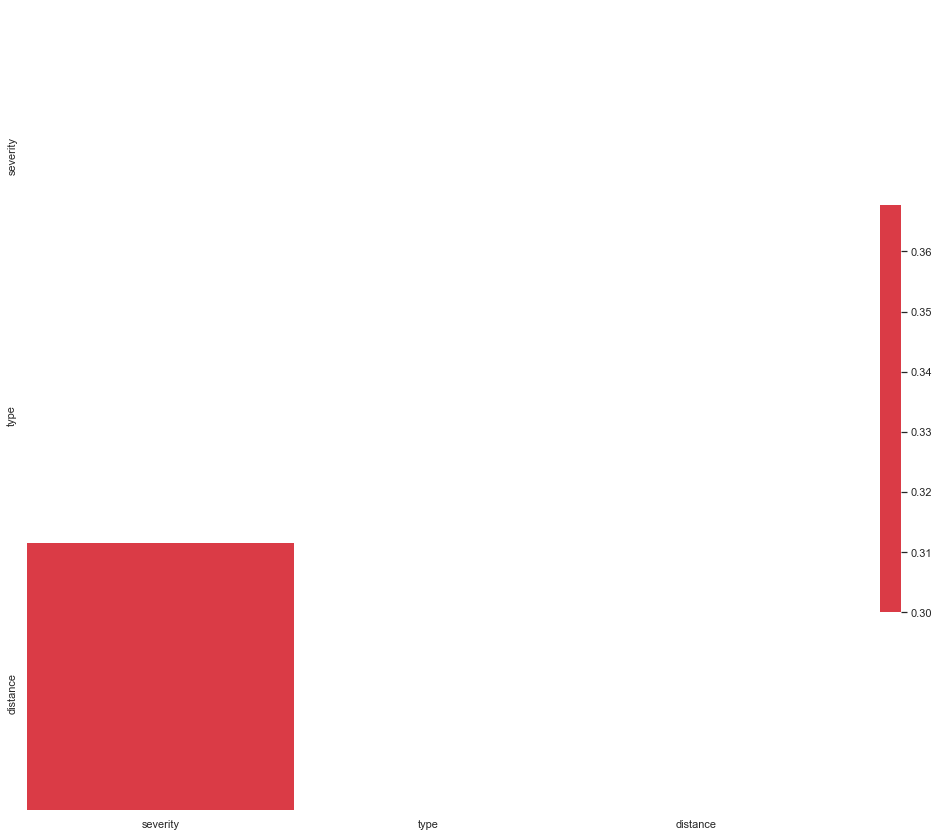

In [40]:
sns.set(style="white")

corr = dataset.drop(columns = ['impacting']).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center = 0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Train-Test-Split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'impacting'),
                                                     dataset['impacting'],
                                                     test_size = 0.2,
                                                     random_state = 0)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [67]:
X_train

,severity,type,startTime,endTime,distance
11,2,1,1,2,2.080000
31,0,1,1,2,0.510000
33,3,1,1,2,29.030001
27,1,1,1,3,0.000000
48,0,1,1,1,3.510000
2,0,1,1,3,0.000000
46,1,1,2,2,0.440000
18,0,1,1,2,0.150000
15,1,1,1,1,0.000000
28,0,1,1,2,0.290000


In [68]:
X_test

,severity,type,startTime,endTime,distance
29,1,1,1,1,0.00
4,0,1,1,1,0.00
26,0,1,1,2,0.00
30,0,1,1,2,0.00
32,0,1,1,1,1.60
37,1,1,3,1,0.15
34,0,1,1,1,0.00
40,3,1,1,1,0.87
7,0,1,1,3,1.21
10,1,1,1,1,1.65


In [69]:
y_train

11    0
31    0
33    0
27    0
48    0
2     0
46    1
18    0
15    1
28    0
22    0
16    0
41    0
20    0
42    0
8     0
13    0
25    0
5     0
17    0
35    0
14    0
38    1
1     0
12    1
43    0
24    0
6     0
23    0
36    1
21    1
19    1
9     1
39    1
45    0
3     0
0     0
47    0
44    0
Name: impacting, dtype: int32

In [70]:
y_test

29    0
4     0
26    0
30    0
32    0
37    1
34    0
40    1
7     0
10    1
Name: impacting, dtype: int32

## Feature Scaling

In [71]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [72]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [73]:
X_train = X_train2
X_test = X_test2

# Model Building

   ## Fitting Model

In [74]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [75]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting Test Set

In [76]:
y_pred = classifier.predict(X_test)

## Evaluating Results

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [78]:
accuracy_score(y_test, y_pred)

0.9

In [79]:
precision_score(y_test, y_pred)

1.0

In [80]:
recall_score(y_test, y_pred)

0.6666666666666666

In [81]:
f1_score(y_test, y_pred)

0.8

Test Data Accuracy: 0.9000


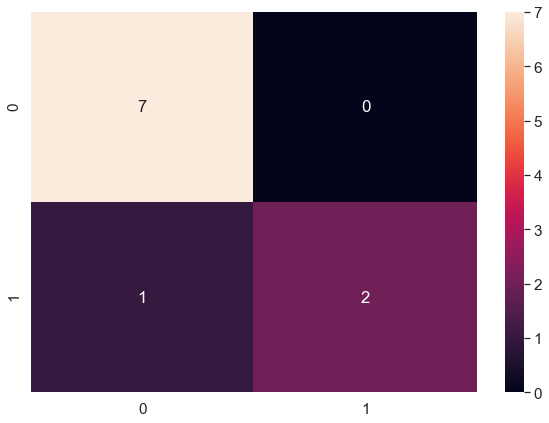

In [82]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## K-Fold Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, 
                             X = X_train, y = y_train,
                             cv = 10)

C:\Users\sindh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [84]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ['coef'])],
           axis = 1)

,features,coef
0,severity,1.073391
1,type,0.000000
2,startTime,0.420229
3,endTime,-0.843787
4,distance,-0.564830


## Feature Selection

In [85]:
from sklearn.feature_selection import RFE

In [86]:
classifier = LogisticRegression()
rfe = RFE(classifier, 20)

C:\Users\sindh\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [87]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [89]:
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [90]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)

In [92]:
accuracy_score(y_test, y_pred)

0.9

In [93]:
precision_score(y_test, y_pred)

1.0

In [94]:
recall_score(y_test, y_pred)

0.6666666666666666

In [96]:
f1_score(y_test, y_pred)

0.8

Test Data Accuracy: 0.9000


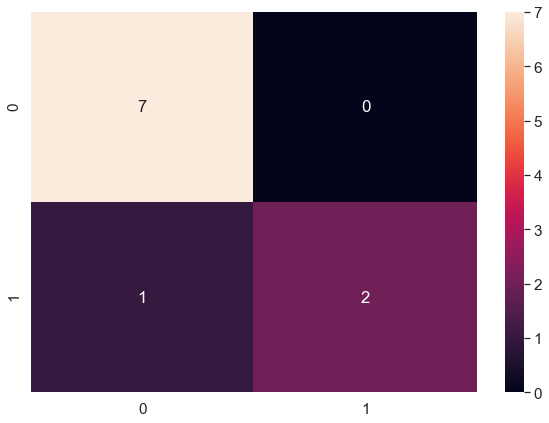

In [97]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [102]:
X_test

,severity,type,startTime,endTime,distance
29,0.192961,0.0,-0.232495,-1.049792,-0.315551
4,-0.882109,0.0,-0.232495,-1.049792,-0.315551
26,-0.882109,0.0,-0.232495,0.270914,-0.315551
30,-0.882109,0.0,-0.232495,0.270914,-0.315551
32,-0.882109,0.0,-0.232495,-1.049792,0.027189
37,0.192961,0.0,8.834821,-1.049792,-0.283420
34,-0.882109,0.0,-0.232495,-1.049792,-0.315551
40,2.343101,0.0,-0.232495,-1.049792,-0.129187
7,-0.882109,0.0,-0.232495,1.591621,-0.056354
10,0.192961,0.0,-0.232495,-1.049792,0.037899


In [103]:
y_test

29    0
4     0
26    0
30    0
32    0
37    1
34    0
40    1
7     0
10    1
Name: impacting, dtype: int32

In [99]:
pred = classifier.predict(X_test.iloc[[3]])

In [101]:
int(pred)

0